# Train the CNN/CapsNet, then generate adv examples

In [1]:
%load_ext autoreload
%autoreload 2

import torch
from torch import optim

from datasets import get_mnist_dataset, get_data_loader
from utils import *

from cnn import *
from capsnet import *

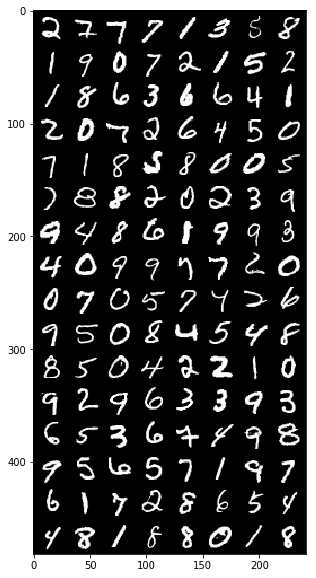

In [2]:
trainset, testset = get_mnist_dataset()
trainloader, testloader = get_data_loader(trainset, testset)
batch, labels = next(iter(trainloader))
plot_batch(batch)

# Custom CNN with few params

In [ ]:
model = CNN().cuda()
print(count_params(model))
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
trainer = Trainer(model, optimizer, criterion, trainloader, testloader, use_cuda=True)

In [ ]:
trainer.run(epochs=5)

# Baseline CNN described in [1]

In [ ]:
model = BaselineCNN().cuda()
print(count_params(model))
# batch_var = Variable(batch.cuda())
# model(batch_var)

# CapsNet described in [1]

In [3]:
pipeline = CapsPipeline().cuda()
batch_var = Variable(batch.cuda())
labels_long = torch.LongTensor(labels)
labels_onehot = torch.sparse.torch.eye(10).index_select(0, labels_long)
labels_var = Variable(labels_onehot.cuda())
probs, reconstructions, loss = pipeline(batch_var, labels_var)

[1] https://arxiv.org/abs/1710.09829